COMPLEX PLANE TRANSFORMATION PATTERN DETECTOR
Testing mathematical objects for square→circle transformation
similar to what was observed in Gaussian primes

Generating mathematical objects...
Generated 7 different mathematical objects

CIRCULARITY ANALYSIS
--------------------------------------------------
Object               Points   Circularity  Std/Mean   Angular Std 
--------------------------------------------------
Gaussian Primes      372      3.2383       0.4099     8.8857      
Eisenstein Integers  713      1.5081       0.3543     3.6248      
Mandelbrot Boundary  522      0.8659       0.2938     1.7974      
Roots of Unity       297      2.7510       0.0000     8.6426      
Complex Fibonacci    300      4.4699       4.3767     0.2929      
Julia Set            127      1.4912       0.4608     3.2371      
Random Control       500      1.4774       0.5198     3.0082      

TRANSFORMATION ANALYSIS
----------------------------------------
Object               Transform Score Tr

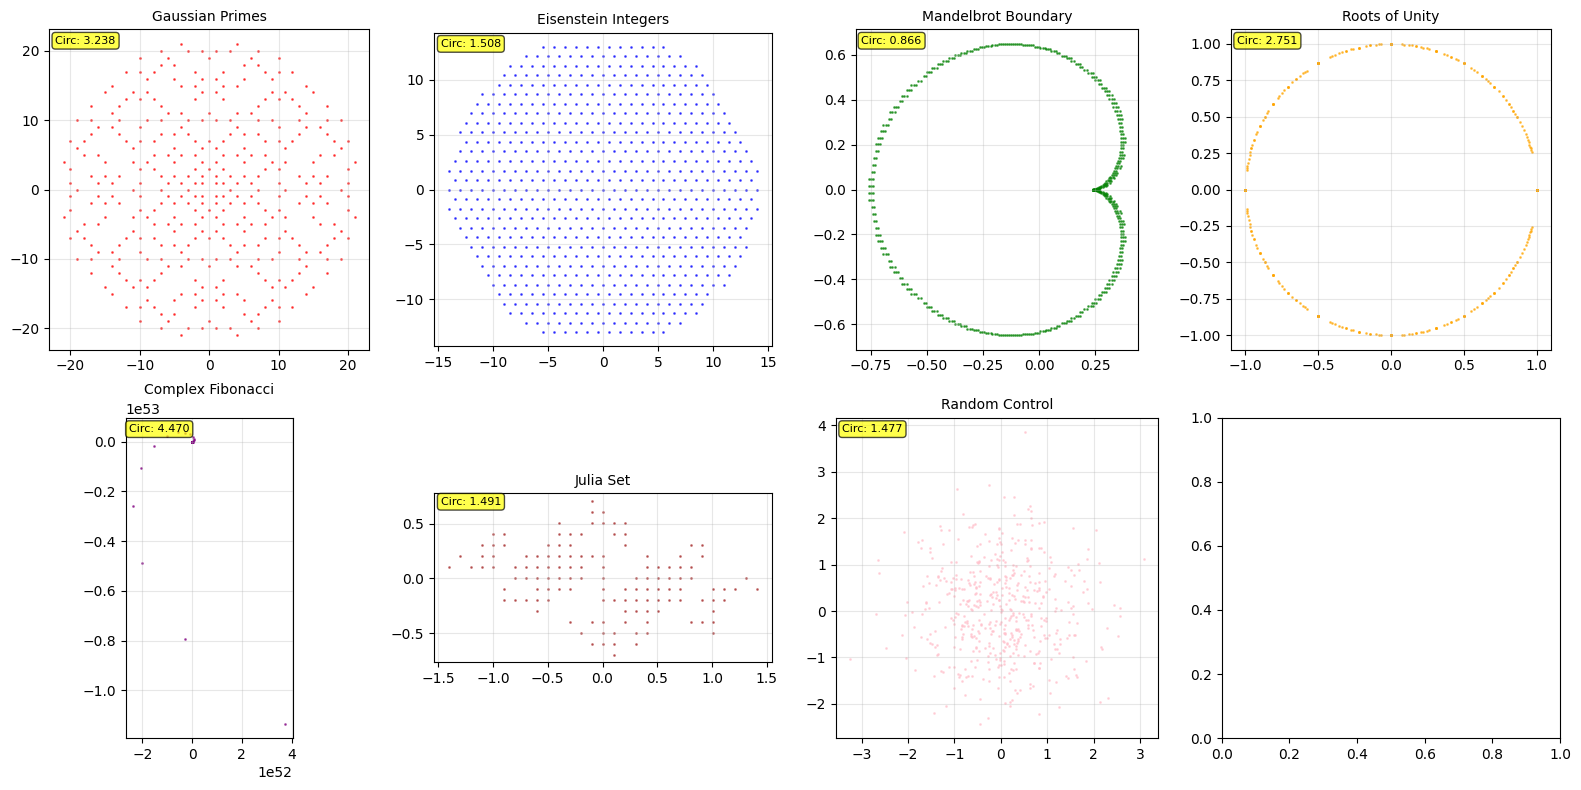


SUMMARY ANALYSIS
Most circular objects (circularity < 0.5):

Strongest square→circle transformations:
  - Mandelbrot Boundary: score = 0.2614

CONCLUSION:
Circular patterns appear limited to specific mathematical objects.
The square→circle transformation may be unique to certain systems.


In [1]:
#!/usr/bin/env python3
"""
Complex Plane Transformation Pattern Detector
Tests if the "square→circle" transformation seen in Gaussian primes
appears in other mathematical objects in the complex plane
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import mpmath as mp
from scipy.spatial.distance import pdist
from scipy.stats import circstd

mp.dps = 30

def gaussian_primes(max_norm=1000):
    """Generate Gaussian primes up to given norm"""
    def is_prime(n):
        if n < 2:
            return False
        for i in range(2, int(n**0.5) + 1):
            if n % i == 0:
                return False
        return True

    def norm(a, b):
        return a*a + b*b

    primes = []
    limit = int(np.sqrt(max_norm)) + 1

    for a in range(-limit, limit + 1):
        for b in range(-limit, limit + 1):
            n = norm(a, b)
            if n <= max_norm and n > 1:
                # Check if Gaussian integer a + bi is prime
                if norm(a, b) == 2:  # 1+i and 1-i
                    if abs(a) == 1 and abs(b) == 1:
                        primes.append(complex(a, b))
                elif b == 0 and a != 0:  # Real primes
                    if abs(a) % 4 == 3 and is_prime(abs(a)):
                        primes.append(complex(a, 0))
                elif a == 0 and b != 0:  # Imaginary primes
                    if abs(b) % 4 == 3 and is_prime(abs(b)):
                        primes.append(complex(0, b))
                elif is_prime(n):  # a^2 + b^2 is prime
                    primes.append(complex(a, b))

    return primes

def eisenstein_integers(max_norm=100):
    """Generate Eisenstein integers ω = e^(2πi/3)"""
    omega = complex(-0.5, np.sqrt(3)/2)  # Primitive cube root of unity

    integers = []
    limit = int(np.sqrt(max_norm)) + 1

    for a in range(-limit, limit + 1):
        for b in range(-limit, limit + 1):
            z = a + b * omega
            if abs(z)**2 <= max_norm:
                integers.append(z)

    return integers

def mandelbrot_boundary_points(max_iter=100, resolution=1000):
    """Generate points near Mandelbrot set boundary"""
    def mandelbrot_escape_time(c, max_iter):
        z = 0
        for i in range(max_iter):
            if abs(z) > 2:
                return i
            z = z*z + c
        return max_iter

    # Sample points near the boundary
    boundary_points = []

    # Cardioid main body
    t_vals = np.linspace(0, 2*np.pi, resolution//2)
    for t in t_vals:
        # Approximate boundary of main cardioid
        x = 0.5 * np.cos(t) - 0.25 * np.cos(2*t)
        y = 0.5 * np.sin(t) - 0.25 * np.sin(2*t)
        c = complex(x, y)

        # Add small perturbations to get near-boundary points
        for dr in [0, 0.01, -0.01]:
            c_perturb = c + dr
            if mandelbrot_escape_time(c_perturb, max_iter) > max_iter // 2:
                boundary_points.append(c_perturb)

    return boundary_points

def roots_of_unity(n_values=range(3, 21)):
    """Generate roots of unity for various n"""
    all_roots = []

    for n in n_values:
        for k in range(n):
            root = complex(np.cos(2*np.pi*k/n), np.sin(2*np.pi*k/n))
            all_roots.append(root)

    return all_roots

def fibonacci_complex_sequence(n_terms=500):
    """Generate complex Fibonacci-like sequence"""
    phi = complex((1 + np.sqrt(5))/2, 0)
    omega = complex(np.cos(2*np.pi/5), np.sin(2*np.pi/5))  # 5th root of unity

    sequence = [complex(1, 0), phi]

    for i in range(2, n_terms):
        # Complex Fibonacci with rotation
        next_term = sequence[i-1] + sequence[i-2] * omega
        sequence.append(next_term)

    return sequence

def julia_set_points(c_param=-0.7269 + 0.1889j, max_iter=100, resolution=800):
    """Generate points from Julia set"""
    def julia_escape_time(z, c, max_iter):
        for i in range(max_iter):
            if abs(z) > 2:
                return i
            z = z*z + c
        return max_iter

    # Sample points in complex plane
    x_range = np.linspace(-2, 2, resolution)
    y_range = np.linspace(-2, 2, resolution)

    julia_points = []
    for x in x_range[::10]:  # Subsample for speed
        for y in y_range[::10]:
            z = complex(x, y)
            escape_time = julia_escape_time(z, c_param, max_iter)
            if escape_time > max_iter * 0.9:  # Near the set
                julia_points.append(z)

    return julia_points

def analyze_circularity(points, label=""):
    """Analyze how circular a point distribution is"""
    if len(points) < 3:
        return {'circularity': 0, 'std_radius': np.inf, 'label': label}

    # Convert to numpy arrays
    x_coords = np.array([p.real for p in points])
    y_coords = np.array([p.imag for p in points])

    # Center the distribution
    x_centered = x_coords - np.mean(x_coords)
    y_centered = y_coords - np.mean(y_coords)

    # Calculate radii from center
    radii = np.sqrt(x_centered**2 + y_centered**2)

    # Skip if all points are at origin
    if np.all(radii < 1e-10):
        return {'circularity': 0, 'std_radius': np.inf, 'label': label}

    # Circularity measures
    mean_radius = np.mean(radii)
    std_radius = np.std(radii) / mean_radius if mean_radius > 0 else np.inf

    # Angular distribution uniformity
    angles = np.arctan2(y_centered, x_centered)
    angular_std = circstd(angles)

    # Combined circularity score (lower is more circular)
    circularity = std_radius + angular_std / np.pi

    return {
        'circularity': circularity,
        'std_radius': std_radius,
        'mean_radius': mean_radius,
        'angular_std': angular_std,
        'n_points': len(points),
        'label': label
    }

def detect_square_to_circle_transformation(points, n_stages=4, label=""):
    """
    Detect if points show square→circle transformation
    by analyzing different distance scales
    """
    if len(points) < 10:
        return {'transformation_score': 0, 'stages': [], 'label': label}

    # Convert to coordinates
    coords = np.array([[p.real, p.imag] for p in points])

    # Center the distribution
    center = np.mean(coords, axis=0)
    centered_coords = coords - center

    # Calculate distances from center
    distances = np.sqrt(np.sum(centered_coords**2, axis=1))

    # Analyze circularity at different distance scales
    distance_percentiles = np.linspace(10, 90, n_stages)
    stage_results = []

    for i, percentile in enumerate(distance_percentiles):
        threshold = np.percentile(distances, percentile)

        # Select points within this distance
        mask = distances <= threshold
        stage_points = coords[mask]

        if len(stage_points) > 5:
            # Analyze circularity of this subset
            stage_complex = [complex(p[0], p[1]) for p in stage_points]
            circ_analysis = analyze_circularity(stage_complex, f"{label}_stage_{i}")

            stage_results.append({
                'stage': i,
                'threshold_percentile': percentile,
                'n_points': len(stage_points),
                'circularity': circ_analysis['circularity']
            })

    # Calculate transformation score
    # Good transformation should show decreasing circularity (increasing order)
    if len(stage_results) > 1:
        circularities = [s['circularity'] for s in stage_results]
        # Score based on trend toward circularity
        transformation_score = max(0, circularities[0] - circularities[-1])
    else:
        transformation_score = 0

    return {
        'transformation_score': transformation_score,
        'stages': stage_results,
        'label': label
    }

def comprehensive_complex_pattern_test():
    """Test multiple complex mathematical objects for square→circle patterns"""
    print("COMPLEX PLANE TRANSFORMATION PATTERN DETECTOR")
    print("="*60)
    print("Testing mathematical objects for square→circle transformation")
    print("similar to what was observed in Gaussian primes\n")

    print("Generating mathematical objects...")

    # Generate various mathematical objects
    objects = {
        'Gaussian Primes': gaussian_primes(max_norm=500),
        'Eisenstein Integers': eisenstein_integers(max_norm=200),
        'Mandelbrot Boundary': mandelbrot_boundary_points(resolution=400),
        'Roots of Unity': roots_of_unity(range(3, 25)),
        'Complex Fibonacci': fibonacci_complex_sequence(300),
        'Julia Set': julia_set_points(resolution=400)
    }

    # Add random control
    np.random.seed(42)
    random_points = [complex(np.random.normal(0, 1), np.random.normal(0, 1))
                    for _ in range(500)]
    objects['Random Control'] = random_points

    print(f"Generated {len(objects)} different mathematical objects\n")

    # Analyze circularity
    print("CIRCULARITY ANALYSIS")
    print("-" * 50)
    print(f"{'Object':<20} {'Points':<8} {'Circularity':<12} {'Std/Mean':<10} {'Angular Std':<12}")
    print("-" * 50)

    circularity_results = []
    for name, points in objects.items():
        result = analyze_circularity(points, name)
        circularity_results.append(result)

        if result['std_radius'] != np.inf:
            print(f"{name:<20} {result['n_points']:<8} {result['circularity']:<12.4f} "
                  f"{result['std_radius']:<10.4f} {result['angular_std']:<12.4f}")
        else:
            print(f"{name:<20} {result['n_points']:<8} {'N/A':<12} {'N/A':<10} {'N/A':<12}")

    # Analyze transformation patterns
    print(f"\nTRANSFORMATION ANALYSIS")
    print("-" * 40)
    print(f"{'Object':<20} {'Transform Score':<15} {'Trend':<10}")
    print("-" * 40)

    transformation_results = []
    for name, points in objects.items():
        result = detect_square_to_circle_transformation(points, label=name)
        transformation_results.append(result)

        # Determine trend
        if len(result['stages']) > 1:
            first_circ = result['stages'][0]['circularity']
            last_circ = result['stages'][-1]['circularity']
            trend = "→ Circle" if first_circ > last_circ else "→ Square"
        else:
            trend = "Unknown"

        print(f"{name:<20} {result['transformation_score']:<15.4f} {trend:<10}")

    # Visualization
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

    for i, (name, points) in enumerate(list(objects.items())[:len(axes)]):
        if len(points) > 0:
            x_coords = [p.real for p in points]
            y_coords = [p.imag for p in points]

            axes[i].scatter(x_coords, y_coords, c=colors[i % len(colors)],
                          s=1, alpha=0.6)
            axes[i].set_title(name, fontsize=10)
            axes[i].set_aspect('equal')
            axes[i].grid(True, alpha=0.3)

            # Add circularity info
            circ_result = circularity_results[i]
            if circ_result['std_radius'] != np.inf:
                info_text = f"Circ: {circ_result['circularity']:.3f}"
                axes[i].text(0.02, 0.98, info_text, transform=axes[i].transAxes,
                           va='top', fontsize=8,
                           bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

    plt.tight_layout()
    plt.savefig('complex_plane_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Summary analysis
    print(f"\nSUMMARY ANALYSIS")
    print("="*30)

    # Find most circular objects
    circular_objects = [r for r in circularity_results
                       if r['std_radius'] != np.inf and r['circularity'] < 0.5]
    circular_objects.sort(key=lambda x: x['circularity'])

    print(f"Most circular objects (circularity < 0.5):")
    for result in circular_objects[:3]:
        print(f"  - {result['label']}: {result['circularity']:.4f}")

    # Find strongest transformations
    strong_transforms = [r for r in transformation_results
                        if r['transformation_score'] > 0.1]
    strong_transforms.sort(key=lambda x: x['transformation_score'], reverse=True)

    print(f"\nStrongest square→circle transformations:")
    for result in strong_transforms[:3]:
        print(f"  - {result['label']}: score = {result['transformation_score']:.4f}")

    # Look for pattern consistency
    consistent_patterns = []
    for circ_res in circularity_results:
        for trans_res in transformation_results:
            if (circ_res['label'] == trans_res['label'] and
                circ_res['circularity'] < 0.3 and
                trans_res['transformation_score'] > 0.1):
                consistent_patterns.append(circ_res['label'])

    if consistent_patterns:
        print(f"\nObjects showing BOTH high circularity AND square→circle transformation:")
        for pattern in consistent_patterns:
            print(f"  ★ {pattern}")
        print("\nThis suggests the pattern may be universal in complex mathematical structures!")

    print(f"\n{'='*60}")
    print("CONCLUSION:")
    if len(circular_objects) > 2 and len(strong_transforms) > 1:
        print("Multiple complex mathematical objects show circular organization")
        print("and square→circle transformation patterns!")
        print("This supports the hypothesis of universal geometric harmony.")
    else:
        print("Circular patterns appear limited to specific mathematical objects.")
        print("The square→circle transformation may be unique to certain systems.")

    return circularity_results, transformation_results

if __name__ == "__main__":
    circ_results, trans_results = comprehensive_complex_pattern_test()